In [657]:
# import nltk
# nltk.download('stopwords')
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize


# Importing Required libraries

In [658]:
from bs4 import BeautifulSoup

# Mounting Google Drive

In [659]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Reading Dataset



In [660]:
with open(r'/content/drive/MyDrive/NLP_Review_3/rte1_dev.xml', 'r') as f:
	data = f.read()

In [661]:
data

'<?xml version="1.0" encoding="UTF-8"?>\n<!DOCTYPE entailment-corpus SYSTEM "rte.dtd">\n<entailment-corpus challenge="1">\n\t<pair id="8" value="FALSE" task="IR">\n\t\t<t>Crude oil for April delivery traded at $37.80 a barrel, down 28 cents</t>\n\t\t<h>Crude oil prices rose to $37.80 per barrel</h>\n\t</pair>\n\t<pair id="12" value="FALSE" task="IR">\n\t\t<t>Oracle had fought to keep the forms from being released</t>\n\t\t<h>Oracle released a confidential document</h>\n\t</pair>\n\t<pair id="13" value="TRUE" task="IR">\n\t\t<t>iTunes software has seen strong sales in Europe.</t>\n\t\t<h>Strong sales for iTunes in Europe.</h>\n\t</pair>\n\t<pair id="15" value="FALSE" task="IR">\n\t\t<t>All genetically modified food, including soya or maize oil produced from GM soya and maize, and food ingredients, must be labelled.</t>\n\t\t<h>Companies selling genetically modified foods don&apos;t need labels.</h>\n\t</pair>\n\t<pair id="19" value="TRUE" task="IR">\n\t\t<t>Researchers at the Harvard Sc

# Passing the stored data inside
# the beautifulsoup parser, storing
# the returned object

In [662]:
Bs_data = BeautifulSoup(data, "xml")
print(Bs_data)

<?xml version="1.0" encoding="utf-8"?>
<!DOCTYPE entailment-corpus SYSTEM "rte.dtd">
<entailment-corpus challenge="1">
<pair id="8" task="IR" value="FALSE">
<t>Crude oil for April delivery traded at $37.80 a barrel, down 28 cents</t>
<h>Crude oil prices rose to $37.80 per barrel</h>
</pair>
<pair id="12" task="IR" value="FALSE">
<t>Oracle had fought to keep the forms from being released</t>
<h>Oracle released a confidential document</h>
</pair>
<pair id="13" task="IR" value="TRUE">
<t>iTunes software has seen strong sales in Europe.</t>
<h>Strong sales for iTunes in Europe.</h>
</pair>
<pair id="15" task="IR" value="FALSE">
<t>All genetically modified food, including soya or maize oil produced from GM soya and maize, and food ingredients, must be labelled.</t>
<h>Companies selling genetically modified foods don't need labels.</h>
</pair>
<pair id="19" task="IR" value="TRUE">
<t>Researchers at the Harvard School of Public Health say that people who drink coffee may be doing a lot more t

## Finding all instances of tag

In [663]:
t_array_all = Bs_data.find_all('t')
h_array_all = Bs_data.find_all('h')

In [664]:
t_array = []
h_array = []
for a in t_array_all:
    s = str(a)
    s = s[3:-4]
    s = s.replace(',', '')
    s = s.replace('-', '')
    if(s[-1]!='.'):
        s = s + "."
    s = s + " "
    t_array.append(s)
    print(s)
#     print(a)
    
for b in h_array_all:
    s = str(b)
    s = s[3:-4]
    s = s.replace(',', '')
    s = s.replace('-', '')
    if(s[-1]!='.'):
        s = s + "."
    s = s + " "
    h_array.append(s)
    print(s)
    print(b)
    
# print(h_arrray[1])


Streaming output truncated to the last 5000 lines.
Because of Reagan's economic strategy the federal budget deficit ballooned. 
Once called the "Queen of the Danube" Budapest has long been the focal point of the nation and a lively cultural centre. 
Vanunu 49 was abducted by Israeli agents and convicted of treason in 1986 after discussing his work as a midlevel Dimona
technician with Britain's Sunday Times newspaper. 
Pakistani officials announced that two South African men in their custody had confessed to planning attacks at popular tourist spots in their home country. 
Meadows scored a bit part in a January episode of "Law &amp; Order". 
Authorities say Monica Meadows who has appeared in catalogs and magazines is in stable condition. 
According to tradition they founded Tenochtitlan ( "Place of the High Priest Tenoch" ) after much wandering when they saw on an island in Lake Texcoco the sign that their god Huitzilopochtli had indicated  an eagle perched on a cactus eating a serpent 

## Without PreProcessing

In [665]:
t_array_all[10]

<t>Iraqi militants said Sunday they would behead Kim Sun-Il, a 33-year-old translator, within 24 hours unless plans to dispatch thousands of South Korean troops to Iraq were abandoned.</t>

## With PreProcessing

In [666]:
t_array[10]

'Iraqi militants said Sunday they would behead Kim SunIl a 33yearold translator within 24 hours unless plans to dispatch thousands of South Korean troops to Iraq were abandoned. '

In [667]:
print(h_array[90])

Kim Il Sung's son is called Kim Jong Il. 


In [668]:
pair_array = Bs_data.find_all('pair')
pair_array[0]

<pair id="8" task="IR" value="FALSE">
<t>Crude oil for April delivery traded at $37.80 a barrel, down 28 cents</t>
<h>Crude oil prices rose to $37.80 per barrel</h>
</pair>

# Printing metadata

In [669]:
id_array = []
value_array = []
for i in pair_array:
    id = i.get('id')
    value = i.get('value')
    id_array.append(id)
    value_array.append(value)
    print(id)
    print(value)

8
FALSE
12
FALSE
13
TRUE
15
FALSE
19
TRUE
20
TRUE
46
FALSE
50
FALSE
52
TRUE
56
TRUE
58
TRUE
59
FALSE
60
FALSE
62
TRUE
63
TRUE
64
TRUE
65
TRUE
66
TRUE
67
FALSE
69
FALSE
73
FALSE
74
TRUE
78
FALSE
79
TRUE
77
FALSE
80
FALSE
83
FALSE
84
TRUE
85
TRUE
86
FALSE
96
TRUE
97
FALSE
98
FALSE
99
TRUE
110
TRUE
114
FALSE
117
FALSE
119
TRUE
121
TRUE
122
TRUE
123
FALSE
125
TRUE
127
TRUE
130
FALSE
131
TRUE
135
TRUE
561
TRUE
562
TRUE
563
FALSE
564
FALSE
565
TRUE
566
FALSE
567
TRUE
568
TRUE
569
TRUE
570
TRUE
571
FALSE
572
FALSE
573
TRUE
574
TRUE
575
TRUE
577
TRUE
578
TRUE
579
TRUE
580
TRUE
581
TRUE
582
TRUE
583
FALSE
585
TRUE
586
TRUE
587
TRUE
589
TRUE
590
TRUE
591
TRUE
592
TRUE
593
TRUE
594
TRUE
601
FALSE
602
FALSE
603
FALSE
606
FALSE
609
FALSE
611
FALSE
613
FALSE
614
FALSE
616
FALSE
619
FALSE
620
FALSE
623
FALSE
625
FALSE
626
FALSE
627
FALSE
629
FALSE
632
FALSE
639
FALSE
641
FALSE
21
FALSE
140
TRUE
143
TRUE
144
TRUE
145
TRUE
147
TRUE
148
FALSE
150
TRUE
152
FALSE
153
TRUE
154
TRUE
155
TRUE
157
TRUE
160
TR

In [670]:
print(id_array)
print(value_array)

['8', '12', '13', '15', '19', '20', '46', '50', '52', '56', '58', '59', '60', '62', '63', '64', '65', '66', '67', '69', '73', '74', '78', '79', '77', '80', '83', '84', '85', '86', '96', '97', '98', '99', '110', '114', '117', '119', '121', '122', '123', '125', '127', '130', '131', '135', '561', '562', '563', '564', '565', '566', '567', '568', '569', '570', '571', '572', '573', '574', '575', '577', '578', '579', '580', '581', '582', '583', '585', '586', '587', '589', '590', '591', '592', '593', '594', '601', '602', '603', '606', '609', '611', '613', '614', '616', '619', '620', '623', '625', '626', '627', '629', '632', '639', '641', '21', '140', '143', '144', '145', '147', '148', '150', '152', '153', '154', '155', '157', '160', '162', '163', '167', '170', '171', '173', '175', '176', '177', '178', '189', '192', '193', '195', '196', '199', '201', '202', '203', '205', '209', '211', '213', '214', '217', '220', '221', '222', '227', '230', '231', '232', '234', '235', '240', '241', '244', '249',

In [671]:
print(len(id_array))
print(len(value_array))
print(len(t_array))
print(len(h_array))

1767
1767
1767
1767


In [672]:
print(id_array[11])
print(value_array[11])
print(t_array[11])
print(h_array[11])

59
FALSE
Two Turkish engineers and an Afghan translator kidnapped in December were freed Friday. 
translator kidnapped in Iraq. 


# Sentance Extraction

In [673]:
l = set(['Mr.', 'Mrs.', 'Ms.', 'Dr.', 'Prof.', 'Rev.', 'Capt.', 'Lt.-Col.', 
'Col.', 'Lt.-Cmdr.', 'The Hon.', 'Cmdr.', 'Flt. Lt.', 'Brgdr.', 'Wng. Cmdr.', 
'Group Capt.' ,'Rt.', 'Maj.-Gen.', 'Rear Admrl.', 'Esq.', 'Mx', 'Adv', 'Jr.',
         'A.','B.','C.','D.','E.','F.','G.','H.','I.','J.','K.','L.','M.','N.',
         'O.','P.','Q.','R.','S.','T.','U.','V.','W.','X.','Y.','Z.','U.S.'] )
s = 'Iraq became a sovereign country Monday morning but only a dozen officials were present at the transfer of power ceremony in the heavily guarded Green Zone of Baghdad. Bremer handed over legal documents that were accepted by Iraq\'s interim Prime Minister Iyad Allawi. '

def split_at_period(input_str, keywords):
    final = []
    split_l = input_str.split(' ')

    for word in split_l:
        if '.' in word and word not in keywords:
            final.append(word + '\n')
            continue
        final.append(word + ' ')


    return ''.join(final).rstrip()


In [674]:
split_at_period(s, l)

"Iraq became a sovereign country Monday morning but only a dozen officials were present at the transfer of power ceremony in the heavily guarded Green Zone of Baghdad.\nBremer handed over legal documents that were accepted by Iraq's interim Prime Minister Iyad Allawi."

# Processing for Text

In [675]:
TbeforeSplit = []
for i in t_array:
    TbeforeSplit.append(split_at_period(i,l))


In [676]:
print(TbeforeSplit[51])

"I just hope I don't become so blissful I become boring."
 Nirvana leader Kurt Cobain giving meaning to his "Teen Spirit" coda "a denial".


In [677]:
TafterSplit = []
for i in TbeforeSplit:
    TafterSplit.append(i.split("\n"))#storing all splitted sentances

In [678]:
t_array[51]

'"I just hope I don\'t become so blissful I become boring."  Nirvana leader Kurt Cobain giving meaning to his "Teen Spirit" coda "a denial". '

In [679]:
TafterSplit[51]

['"I just hope I don\'t become so blissful I become boring."',
 ' Nirvana leader Kurt Cobain giving meaning to his "Teen Spirit" coda "a denial".']

# Extracting Subject, Predicate and Object from the Sentance

In [680]:
!pwd

/content/drive/MyDrive/NLP_Review_3


In [681]:
%cd "/content/drive/MyDrive/NLP_Review_3"

/content/drive/MyDrive/NLP_Review_3


In [682]:
from subject_verb_object_extract import findSVOs, nlp
TSOP = []#array to fill S,O and p
for FullSentance in TafterSplit:
    SOPFullSentance = []
    for splittedSentance in FullSentance:
        SOPSplittedSentance = []
        tokens = nlp(splittedSentance)
        svos = findSVOs(tokens)
#         print(svos)
        
        S=[]
        O=[]
        P=[]
        for eachSOP in svos:
#             print(eachSOP)
            for eachSubject in eachSOP[0].split(","):
                if(len(eachSubject)>0):
                    S.append(eachSubject)
            if(len(eachSOP)>1):
                for eachPredicate in eachSOP[1].split(","):
                    if(len(eachPredicate)>0):
                        P.append(eachPredicate)
            if(len(eachSOP)>2):
                for eachObject in eachSOP[2].split(","):
                    if(len(eachObject)>0):
                        O.append(eachObject)
        SOPSplittedSentance.append(S)
        SOPSplittedSentance.append(P)
        SOPSplittedSentance.append(O)
        SOPFullSentance.append(SOPSplittedSentance)
    TSOP.append(SOPFullSentance)    
#         print(SOPFullSentance)
#         print(O)
#         print(P)
    
print(TSOP)
        

[[[['Crude oil for April delivery'], ['traded'], []], [[], [], []]], [[['the forms'], ['keep'], ['Oracle']]], [[['iTunes software'], ['seen'], ['strong sales in']]], [[['All food', 'soya', 'All food', 'GM soya', 'maize ingredients', 'oil'], ['modified', 'include', 'maize', 'produce', 'produce', 'labelled'], ['All food', 'oil', 'oil']]], [[['Researchers at', 'who', 'people', 'this kind of consumption'], ['say', 'drink', 'doing', 'reduce'], ['coffee', 'the risk of diseases']]], [[['Eating lots', 'you'], ['keep', 'eat'], ['your blood glucose']]], [[['The Yankees'], ['split'], ['Hollywood']]], [[['Scientists at', 'a coronavirus'], ['discovered', 'isolated'], ['the complete genetic sequence of a coronavirus']]], [[[], [], []], [[], [], []]], [[[], [], []]], [[['Iraqi militants', 'Kim SunIl', 'a 33yearold translator', '24 hours', 'thousands of Korean troops', 'Iraq', 'plans'], ['said', 'behead', 'behead', 'behead', 'dispatch', 'dispatch', 'abandoned'], ['they', 'they', 'they', 'plans', 'plan

In [683]:
t_array[10]

'Iraqi militants said Sunday they would behead Kim SunIl a 33yearold translator within 24 hours unless plans to dispatch thousands of South Korean troops to Iraq were abandoned. '

In [684]:
TSOP[10]

[[['Iraqi militants',
   'Kim SunIl',
   'a 33yearold translator',
   '24 hours',
   'thousands of Korean troops',
   'Iraq',
   'plans'],
  ['said', 'behead', 'behead', 'behead', 'dispatch', 'dispatch', 'abandoned'],
  ['they', 'they', 'they', 'plans', 'plans']]]

In [685]:
for i in TSOP:
  print(i)

[[['Crude oil for April delivery'], ['traded'], []], [[], [], []]]
[[['the forms'], ['keep'], ['Oracle']]]
[[['iTunes software'], ['seen'], ['strong sales in']]]
[[['All food', 'soya', 'All food', 'GM soya', 'maize ingredients', 'oil'], ['modified', 'include', 'maize', 'produce', 'produce', 'labelled'], ['All food', 'oil', 'oil']]]
[[['Researchers at', 'who', 'people', 'this kind of consumption'], ['say', 'drink', 'doing', 'reduce'], ['coffee', 'the risk of diseases']]]
[[['Eating lots', 'you'], ['keep', 'eat'], ['your blood glucose']]]
[[['The Yankees'], ['split'], ['Hollywood']]]
[[['Scientists at', 'a coronavirus'], ['discovered', 'isolated'], ['the complete genetic sequence of a coronavirus']]]
[[[], [], []], [[], [], []]]
[[[], [], []]]
[[['Iraqi militants', 'Kim SunIl', 'a 33yearold translator', '24 hours', 'thousands of Korean troops', 'Iraq', 'plans'], ['said', 'behead', 'behead', 'behead', 'dispatch', 'dispatch', 'abandoned'], ['they', 'they', 'they', 'plans', 'plans']]]
[[['D

# Processing for Hypothesis


In [686]:
HbeforeSplit = []
for i in h_array:
    HbeforeSplit.append(split_at_period(i,l))


In [687]:
print(HbeforeSplit[51])

"Smells Like Teen Spirit" is a song by Nirvana.


In [688]:
h_array[0]

'Crude oil prices rose to $37.80 per barrel. '

In [689]:
HafterSplit = []
for i in HbeforeSplit:
    HafterSplit.append(i.split("\n"))#storing all splitted sentances

In [690]:
HafterSplit[0]

['Crude oil prices rose to $37.80', 'per barrel.']

In [691]:
from subject_verb_object_extract import findSVOs, nlp
HSOP = []#array to fill S,O and p
for FullSentance in HafterSplit:
    SOPFullSentance = []
    for splittedSentance in FullSentance:
        SOPSplittedSentance = []
        tokens = nlp(splittedSentance)
        svos = findSVOs(tokens)
#         print(svos)
        
        S=[]
        O=[]
        P=[]
        for eachSOP in svos:
#             print(eachSOP)
            for eachSubject in eachSOP[0].split(","):
                if(len(eachSubject)>0):
                    S.append(eachSubject)
            if(len(eachSOP)>1):
                for eachPredicate in eachSOP[1].split(","):
                    if(len(eachPredicate)>0):
                        P.append(eachPredicate)
            if(len(eachSOP)>2):
                for eachObject in eachSOP[2].split(","):
                    if(len(eachObject)>0):
                        O.append(eachObject)
        SOPSplittedSentance.append(S)
        SOPSplittedSentance.append(P)
        SOPSplittedSentance.append(O)
        SOPFullSentance.append(SOPSplittedSentance)
    HSOP.append(SOPFullSentance)    
#         print(SOPFullSentance)
#         print(O)
#         print(P)
    
print(HSOP)
        

[[[['Crude oil prices'], ['rose'], []], [[], [], []]], [[['Oracle'], ['released'], ['a confidential document']]], [[[], [], []]], [[['Companies', 'foods', 'Companies'], ['selling', 'modified', '!need'], ['foods', 'labels']]], [[['Coffee drinking'], ['has'], ['health benefits']]], [[['Fiber'], ['improves'], ['sugar control']]], [[['Dodgers'], ['lose'], ['first game']]], [[['Singapore scientists', 'SARS virus'], ['reveal', 'undergone'], ['genetic changes']]], [[['band Phish'], ['holds'], ['final concert']]], [[[], [], []]], [[['translator'], ['kidnapped'], []]], [[['translator'], ['kidnapped'], []]], [[['Mexicans'], ['cross'], ['border']]], [[[], [], []]], [[['British servicemen'], ['detained'], []]], [[['It'], ['takes'], []]], [[['Coal stocks'], ['rise'], []]], [[['British servicemen'], ['detained'], []]], [[['Coal stocks'], ['rise'], []]], [[['Anorexia'], ['becomes'], []]], [[['driver licenses'], ['granted'], []]], [[['South Korea'], ['send'], ['troops']]], [[['Clinton book'], ['is'], 

# Calculating Cosine Similarity

In [692]:
print(len(t_array))
print(len(h_array))


1767
1767


In [693]:
def cosineSimilarity(t,h):
    X =t
    Y =h

    # tokenization
    X_list = word_tokenize(X)
    Y_list = word_tokenize(Y)

    # sw contains the list of stopwords
    sw = stopwords.words('english')
    l1 =[];l2 =[]

    # remove stop words from the string
    X_set = {w for w in X_list if not w in sw}
    Y_set = {w for w in Y_list if not w in sw}

    # form a set containing keywords of both strings
    rvector = X_set.union(Y_set)
    for w in rvector:
        if w in X_set: l1.append(1) # create a vector
        else: l1.append(0)
        if w in Y_set: l2.append(1)
        else: l2.append(0)
    c = 0

    # cosine formula
    for i in range(len(rvector)):
            c+= l1[i]*l2[i]
    if(float((sum(l1)*sum(l2))**0.5) ==0):
        return 0
    cosine = c / float((sum(l1)*sum(l2))**0.5)
    return cosine

# Cosine Similarity between T and H directly

In [694]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [695]:
t_h = []
for i in range (len(t_array)):
    t_h.append(cosineSimilarity(t_array[i],h_array[i]))



In [696]:
 print(t_h)

[0.6030226891555273, 0.5477225575051661, 0.6761234037828132, 0.2672612419124244, 0.09534625892455924, 0.2182178902359924, 0.20203050891044214, 0.3333333333333333, 0.625, 0.5303300858899106, 0.3127716210856122, 0.4743416490252569, 0.5163977794943222, 0.5477225575051661, 0.6030226891555273, 0.3418817293789138, 0.3, 0.30151134457776363, 0.23570226039551587, 0.3872983346207417, 0.6396021490668313, 0.3563483225498992, 0.9258200997725514, 0.1091089451179962, 0.3849001794597505, 0.08574929257125441, 0.375, 0.27975144247209416, 0.30779350562554625, 0.4743416490252569, 0.22677868380553634, 0.3779644730092272, 0.50709255283711, 0.2581988897471611, 0.6761234037828132, 0.3464101615137754, 0.15762208124782012, 0.7071067811865475, 0.41602514716892186, 0.36380343755449945, 0.31622776601683794, 0.5547001962252291, 0.5, 0.23904572186687872, 0.5303300858899106, 0.3779644730092272, 0.4472135954999579, 0.5533985905294664, 0.1690308509457033, 0.545544725589981, 0.5276448530110863, 0.45883146774112354, 0.45

# Best Cosine Similarity without Parts of Sentance

In [697]:
best_t_h =[]
for indexOfFullSentance in range(len(TafterSplit)):
    best=-1
    for TindexOfSplittedSentance in range(len(TafterSplit[indexOfFullSentance])):
        for HindexOfSplittedSentance in range(len(HafterSplit[indexOfFullSentance])):
            a = cosineSimilarity(TafterSplit[indexOfFullSentance][TindexOfSplittedSentance],HafterSplit[indexOfFullSentance][HindexOfSplittedSentance])
            if(best<a):
                best =a
    best_t_h.append(best)

In [698]:
TafterSplit[0][0]

'Crude oil for April delivery traded at $37.80'

In [699]:
best_t_h[0]

0.6172133998483676

In [700]:
for i in best_t_h:
    print(i)
#     print("\n")

0.6172133998483676
0.5477225575051661
0.6761234037828132
0.2672612419124244
0.09534625892455924
0.2182178902359924
0.20203050891044214
0.3333333333333333
0.6681531047810609
0.5303300858899106
0.3127716210856122
0.4743416490252569
0.5163977794943222
0.5477225575051661
0.6030226891555273
0.3418817293789138
0.3
0.30151134457776363
0.17677669529663687
0.3872983346207417
0.6396021490668313
0.3563483225498992
0.9258200997725514
0.1091089451179962
0.3849001794597505
0.08574929257125441
0.375
0.27975144247209416
0.282842712474619
0.4743416490252569
0.22677868380553634
0.3779644730092272
0.50709255283711
0.2581988897471611
0.6761234037828132
0.3464101615137754
0.15762208124782012
0.7071067811865475
0.41602514716892186
0.36380343755449945
0.31622776601683794
0.5547001962252291
0.5
0.23904572186687872
0.5303300858899106
0.3779644730092272
0.4472135954999579
0.5533985905294664
0.1690308509457033
0.545544725589981
0.5276448530110863
0.554700196225229
0.4583492485141057
0.567774973957669
0.441941738

In [701]:
print(len(best_t_h))
print(len(t_h))

1767
1767


# Best Cosine Similarity with Parts of Sentance

In [702]:
best_t_h_spo = []
for indexOfFullSentance in range(len(TSOP)):
    best=-1
    for TindexOfSplittedSentance in range(len(TSOP[indexOfFullSentance])):
        for HindexOfSplittedSentance in range(len(HSOP[indexOfFullSentance])):
            for i in range(3):
                if(len(TSOP[indexOfFullSentance][TindexOfSplittedSentance][i])==0 or HSOP[indexOfFullSentance][HindexOfSplittedSentance][i]==0):
                    a = 0
                    best=0
                else:
                    for j in range(len(TSOP[indexOfFullSentance][TindexOfSplittedSentance][i])):
                        for k in range(len(HSOP[indexOfFullSentance][HindexOfSplittedSentance][i])):
                            a = cosineSimilarity(TSOP[indexOfFullSentance][TindexOfSplittedSentance][i][j],HSOP[indexOfFullSentance][HindexOfSplittedSentance][i][k])
                            if(best<a):
                                best =a
    if(best==-1):
        best=0
    best_t_h_spo.append(best)

In [703]:
best_t_h_spo

[0,
 0.0,
 0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.35355339059327373,
 0,
 0,
 0.7071067811865475,
 0.7071067811865475,
 1.0,
 0,
 1.0,
 0,
 0.5,
 0.0,
 0,
 0,
 0,
 1.0,
 1.0,
 0.0,
 0,
 0.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.0,
 0,
 1.0,
 0.0,
 0.0,
 0.0,
 0,
 0.0,
 0,
 0.0,
 1.0,
 0.0,
 0,
 0.3779644730092272,
 0.5,
 1.0,
 0.0,
 0.0,
 0.2886751345948129,
 0,
 0.8164965809277261,
 0.0,
 0.0,
 0,
 0.0,
 0.0,
 0.0,
 0,
 0.0,
 0,
 0,
 0.0,
 0,
 0.0,
 0.0,
 0.0,
 0,
 1.0,
 0,
 0,
 0.0,
 1.0,
 0.0,
 0,
 0.8164965809277261,
 0.2886751345948129,
 1.0,
 0,
 0.0,
 0,
 0,
 0.8164965809277261,
 0,
 0.0,
 0.0,
 0,
 0.0,
 0.0,
 1.0,
 0,
 0.0,
 0.0,
 0.0,
 0,
 0,
 1.0,
 1.0,
 0.0,
 0,
 0,
 0,
 0.0,
 1.0,
 0,
 0,
 1.0,
 0.6666666666666666,
 0,
 0,
 0.0,
 0,
 1.0,
 0,
 0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0,
 1.0,
 0,
 0,
 0,
 0.7071067811865475,
 1.0,
 1.0,
 1.0,
 0,
 0,
 0.31622776601683794,
 0.5163977794943222,
 0.8164965809277261,
 0.7071067811865475,
 0.0,
 1.0,
 1.0,
 1.0,
 0,
 0.0,
 0.7071067811865475,
 0.0,
 0,


# Average Cosine Similarity with Parts of Sentance

In [704]:
avg_t_h_spo = []
for indexOfFullSentance in range(len(TSOP)):
    sum1=0
    count=0
    for TindexOfSplittedSentance in range(len(TSOP[indexOfFullSentance])):
        for HindexOfSplittedSentance in range(len(HSOP[indexOfFullSentance])):
            for i in range(3):

                if(len(TSOP[indexOfFullSentance][TindexOfSplittedSentance][i])==0 or HSOP[indexOfFullSentance][HindexOfSplittedSentance][i]==0):
                    a = 0
                else:
                    for j in range(len(TSOP[indexOfFullSentance][TindexOfSplittedSentance][i])):
                        for k in range(len(HSOP[indexOfFullSentance][HindexOfSplittedSentance][i])):
                            a = cosineSimilarity(TSOP[indexOfFullSentance][TindexOfSplittedSentance][i][j],HSOP[indexOfFullSentance][HindexOfSplittedSentance][i][k])
                            sum1 =sum1+a
                            count=count+1
    
    if(count==0):
        best=0
    else:
        best=sum1/count
    avg_t_h_spo.append(best)

In [705]:
avg_t_h_spo

[0.2886751345948129,
 0.0,
 0,
 0.023809523809523808,
 0.0,
 0.0,
 0.0,
 0.039283710065919304,
 0,
 0,
 0.050507627227610534,
 0.1178511301977579,
 0.1111111111111111,
 0,
 0.45412414523193156,
 0.0,
 0.05,
 0.0,
 0.14433756729740646,
 0.0,
 0.0,
 0.16919417382415922,
 0.605498860309242,
 0.0,
 0.0,
 0.0,
 0.2886751345948129,
 0.0,
 0.0,
 0.2886751345948129,
 0,
 0,
 0.0,
 0.0,
 0.7845177968644247,
 0.0,
 0.0,
 0.0,
 0.25,
 0.0,
 0.10206207261596577,
 0.0,
 0.566227766016838,
 0.0,
 0,
 0.1259881576697424,
 0.1111111111111111,
 0.1,
 0.0,
 0.0,
 0.04811252243246882,
 0,
 0.0907218423253029,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.45412414523193156,
 0.16666666666666666,
 0.0,
 0,
 0.0,
 0.047619047619047616,
 0.0,
 0.0,
 0.20412414523193154,
 0.020619652471058066,
 0.125,
 0.0,
 0.0,
 0,
 0.17677669529663687,
 0.06804138174397718,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.14285714285714285,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.3739454

# Model Training

## Creating Labels array

In [706]:
labels = []
for i in pair_array:
    if (i.get('value')=="TRUE"):
        labels.append(1)
    else:
        labels.append(0)
#     print(i.get('value'))

In [707]:
labels

[0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,


## Creating Dataframe

In [708]:
import pandas as pd
df = pd.DataFrame(list(zip(t_h, best_t_h, best_t_h_spo, avg_t_h_spo,labels)),
               columns =['t_h', 'best_t_h','best_t_h_spo','avg_t_h_spo','labels'])
df

,t_h,best_t_h,best_t_h_spo,avg_t_h_spo,labels
0,0.603023,0.617213,0.000000,0.288675,0
1,0.547723,0.547723,0.000000,0.000000,0
2,0.676123,0.676123,0.000000,0.000000,1
3,0.267261,0.267261,1.000000,0.023810,0
4,0.095346,0.095346,0.000000,0.000000,1
...,...,...,...,...,...
1762,0.396059,0.396059,1.000000,0.155192,0
1763,0.606780,0.606780,1.000000,0.325192,0
1764,0.400000,0.400000,1.000000,0.181818,0
1765,0.534522,0.534522,0.408248,0.081650,0


In [709]:
df.shape

(1767, 5)

In [710]:
Xdf = df[['t_h', 'best_t_h','best_t_h_spo','avg_t_h_spo']]
Xdf

,t_h,best_t_h,best_t_h_spo,avg_t_h_spo
0,0.603023,0.617213,0.000000,0.288675
1,0.547723,0.547723,0.000000,0.000000
2,0.676123,0.676123,0.000000,0.000000
3,0.267261,0.267261,1.000000,0.023810
4,0.095346,0.095346,0.000000,0.000000
...,...,...,...,...
1762,0.396059,0.396059,1.000000,0.155192
1763,0.606780,0.606780,1.000000,0.325192
1764,0.400000,0.400000,1.000000,0.181818
1765,0.534522,0.534522,0.408248,0.081650


In [711]:
X = Xdf.values 
y = df.labels.values
print(X)
print(y)

[[0.60302269 0.6172134  0.         0.28867513]
 [0.54772256 0.54772256 0.         0.        ]
 [0.6761234  0.6761234  0.         0.        ]
 ...
 [0.4        0.4        1.         0.18181818]
 [0.53452248 0.53452248 0.40824829 0.08164966]
 [0.46291005 0.46291005 0.         0.        ]]
[0 0 1 ... 0 0 0]



## Splitting X and y into training and testing sets

In [712]:
X = Xdf.values 
y = df.labels.values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)



In [713]:
xtrain = X_train
ytrain = y_train
xtest=X_test
ytest = y_test

# BASE PREDICTIORS

In [714]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics

# 1- SVM

In [715]:
from sklearn.svm import SVC

In [716]:
svm_model=SVC()
svm_model.fit(xtrain,ytrain)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [717]:
predsvm=svm_model.predict(xtest)
svm_model.score(xtest,ytest)*100

85.57284299858557

In [718]:
accuracy=confusion_matrix(ytest,predsvm)
TP=accuracy[0][0]
FP=accuracy[1][0]
TN=accuracy[1][1]
FN=accuracy[0][1]

print("Accuracy: ",(TP+TN)/(TP+FP+TN+FN)*100)
print("Probability of detection of defect(Recall, pd): ",TN/(TN+FP))
print("Probability of false alarm(pf): ",FP/(TP+FP))
print("Probability of correct detection(Precision): ", TN/(TN+FN))
print("\n")
print("F1-score or FM: ", f1_score(ytest, predsvm, average='binary'))
print("AUC value: ",roc_auc_score(ytest, predsvm))
print("\n")
print("   P    N")
print(confusion_matrix(ytest,predsvm))
print("\n")
print(classification_report(ytest,predsvm))

Accuracy:  85.57284299858557
Probability of detection of defect(Recall, pd):  0.0
Probability of false alarm(pf):  0.14427157001414428
Probability of correct detection(Precision):  nan


F1-score or FM:  0.0
AUC value:  0.5


   P    N
[[605   0]
 [102   0]]


              precision    recall  f1-score   support

           0       0.86      1.00      0.92       605
           1       0.00      0.00      0.00       102

    accuracy                           0.86       707
   macro avg       0.43      0.50      0.46       707
weighted avg       0.73      0.86      0.79       707



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in long_scalars
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


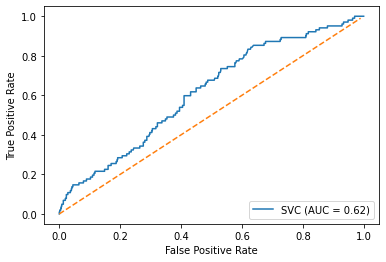

In [719]:
x=np.arange(100)*0.01
y=x

disp = plot_roc_curve(svm_model, xtest, ytest)
plt.plot(x,y, '--')
plt.show()

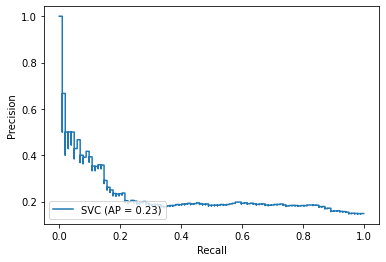

In [720]:
disp = plot_precision_recall_curve(svm_model, xtest, ytest)
plt.show()

# 2- KNN

In [721]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=11)

In [722]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [723]:
predknn=knn.predict(xtest)
knn.score(xtest,ytest)*100

85.2899575671853

In [724]:
accuracy=confusion_matrix(ytest,predknn)
TP=accuracy[0][0]
FP=accuracy[1][0]
TN=accuracy[1][1]
FN=accuracy[0][1]

print("Accuracy: ",(TP+TN)/(TP+FP+TN+FN)*100)
print("Probability of detection of defect(Recall, pd): ",TN/(TN+FP))
print("Probability of false alarm(pf): ",FP/(TP+FP))
print("Probability of correct detection(Precision): ", TN/(TN+FN))
print("\n")
print("F1-score or FM: ", f1_score(ytest, predknn, average='binary'))
print("AUC value: ",roc_auc_score(ytest, predknn))
print("\n")
print(confusion_matrix(ytest,predknn))
print("\n")
print(classification_report(ytest,predknn))

Accuracy:  85.2899575671853
Probability of detection of defect(Recall, pd):  0.0196078431372549
Probability of false alarm(pf):  0.14265335235378032
Probability of correct detection(Precision):  0.3333333333333333


F1-score or FM:  0.037037037037037035
AUC value:  0.5064981364446605


[[601   4]
 [100   2]]


              precision    recall  f1-score   support

           0       0.86      0.99      0.92       605
           1       0.33      0.02      0.04       102

    accuracy                           0.85       707
   macro avg       0.60      0.51      0.48       707
weighted avg       0.78      0.85      0.79       707



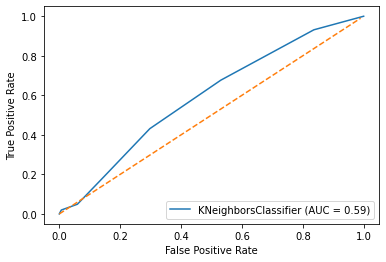

In [725]:
x=np.arange(100)*0.01
y=x

disp = plot_roc_curve(knn, xtest, ytest)
plt.plot(x,y, '--')
plt.show()

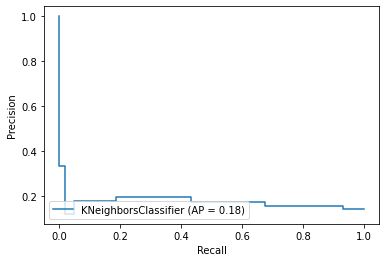

In [726]:
disp = plot_precision_recall_curve(knn, xtest, ytest)
plt.show()

In [727]:
# try K=1 through K=25 and record testing accuracy
k_range = range(1, 15)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(xtrain, ytrain)
    y_pred = knn.predict(xtest)
    scores.append(metrics.accuracy_score(ytest, y_pred))

print(scores)

[0.7157001414427157, 0.8345120226308345, 0.7835926449787836, 0.8415841584158416, 0.826025459688826, 0.8458274398868458, 0.8387553041018387, 0.8500707213578501, 0.8387553041018387, 0.8543140028288543, 0.8528995756718529, 0.8557284299858557, 0.8528995756718529, 0.8557284299858557]


Text(0, 0.5, 'Testing Accuracy')

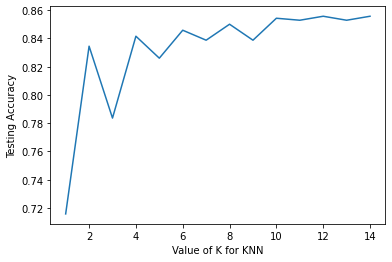

In [728]:
# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

# 3- NAIVE BAYES

In [729]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [730]:
gnb.fit(xtrain,ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [731]:
predg=gnb.predict(xtest)
gnb.score(xtest,ytest)*100

82.03677510608203

In [732]:
accuracy=confusion_matrix(ytest,predg)
TP=accuracy[0][0]
FP=accuracy[1][0]
TN=accuracy[1][1]
FN=accuracy[0][1]

print("Accuracy: ",(TP+TN)/(TP+FP+TN+FN)*100)
print("Probability of detection of defect(Recall, pd): ",TN/(TN+FP))
print("Probability of false alarm(pf): ",FP/(TP+FP))
print("Probability of correct detection(Precision): ", TN/(TN+FN))
print("\n")
print("F1-score or FM: ", f1_score(ytest, predg, average='binary'))
print("AUC value: ",roc_auc_score(ytest, predg))
print("\n")
print(confusion_matrix(ytest,predg))
print("\n")
print(classification_report(ytest,predg))

Accuracy:  82.03677510608203
Probability of detection of defect(Recall, pd):  0.13725490196078433
Probability of false alarm(pf):  0.1345565749235474
Probability of correct detection(Precision):  0.2641509433962264


F1-score or FM:  0.1806451612903226
AUC value:  0.5363960460217144


[[566  39]
 [ 88  14]]


              precision    recall  f1-score   support

           0       0.87      0.94      0.90       605
           1       0.26      0.14      0.18       102

    accuracy                           0.82       707
   macro avg       0.56      0.54      0.54       707
weighted avg       0.78      0.82      0.80       707



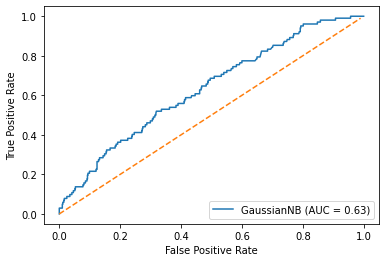

In [733]:
x=np.arange(100)*0.01
y=x

disp = plot_roc_curve(gnb, xtest, ytest)
plt.plot(x,y, '--')
plt.show()

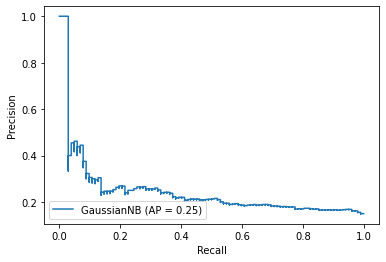

In [734]:
disp = plot_precision_recall_curve(gnb, xtest, ytest)
plt.show()

In [735]:
c=0
l=len(ytest)
for i in range(0,l):
    if(predg[i]!=ytest[i]):
        c=c+1
print("Number of mislabeled points out of a total %d points : %d" %(l,c))

Number of mislabeled points out of a total 707 points : 127


# 4- LOGISTIC REGRESSION

In [736]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()

In [737]:
logmodel.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [738]:
predlog=logmodel.predict(xtest)
logistic_score=logmodel.score(xtest,ytest)*100
logistic_score

85.57284299858557

In [739]:
accuracy=confusion_matrix(ytest,predlog)
TP=accuracy[0][0]
FP=accuracy[1][0]
TN=accuracy[1][1]
FN=accuracy[0][1]

print("Accuracy: ",(TP+TN)/(TP+FP+TN+FN)*100)
print("Probability of detection of defect(Recall, pd): ",TN/(TN+FP))
print("Probability of false alarm(pf): ",FP/(TP+FP))
print("Probability of correct detection(Precision): ", TN/(TN+FN))
print("\n")
print("F1-score or FM: ", f1_score(ytest, predlog, average='binary'))
print("AUC value: ",roc_auc_score(ytest, predlog))
print("\n")
print(confusion_matrix(ytest,predlog))
print("\n")
print(classification_report(ytest,predlog))

Accuracy:  85.57284299858557
Probability of detection of defect(Recall, pd):  0.0
Probability of false alarm(pf):  0.14427157001414428
Probability of correct detection(Precision):  nan


F1-score or FM:  0.0
AUC value:  0.5


[[605   0]
 [102   0]]


              precision    recall  f1-score   support

           0       0.86      1.00      0.92       605
           1       0.00      0.00      0.00       102

    accuracy                           0.86       707
   macro avg       0.43      0.50      0.46       707
weighted avg       0.73      0.86      0.79       707



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in long_scalars
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


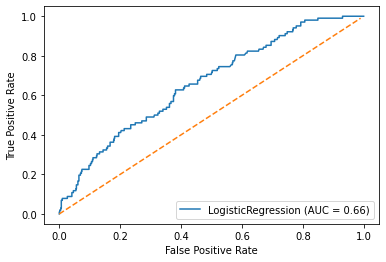

In [740]:
x=np.arange(100)*0.01
y=x

disp = plot_roc_curve(logmodel, xtest, ytest)
plt.plot(x,y, '--')
plt.show()

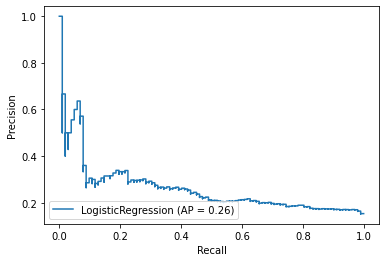

In [741]:
disp = plot_precision_recall_curve(logmodel, xtest, ytest)
plt.show()

# 5- MLP

In [742]:
from sklearn.neural_network import MLPClassifier

In [743]:
model=MLPClassifier(hidden_layer_sizes=(20,20),max_iter=2000)
model.fit(xtrain,ytrain)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20, 20), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=2000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [744]:
predn=model.predict(xtest)
model.score(xtest,ytest)*100

85.57284299858557

In [745]:
accuracy=confusion_matrix(ytest,predn)
TP=accuracy[0][0]
FP=accuracy[1][0]
TN=accuracy[1][1]
FN=accuracy[0][1]

print("Accuracy: ",(TP+TN)/(TP+FP+TN+FN)*100)
print("Probability of detection of defect(Recall, pd): ",TN/(TN+FP))
print("Probability of false alarm(pf): ",FP/(TP+FP))
print("Probability of correct detection(Precision): ", TN/(TN+FN))
print("\n")
print("F1-score or FM: ", f1_score(ytest, predn, average='binary'))
print("AUC value: ",roc_auc_score(ytest, predn))
print("\n")
print(confusion_matrix(ytest,predn))
print("\n")
print(classification_report(ytest,predn))

Accuracy:  85.57284299858557
Probability of detection of defect(Recall, pd):  0.0
Probability of false alarm(pf):  0.14427157001414428
Probability of correct detection(Precision):  nan


F1-score or FM:  0.0
AUC value:  0.5


[[605   0]
 [102   0]]


              precision    recall  f1-score   support

           0       0.86      1.00      0.92       605
           1       0.00      0.00      0.00       102

    accuracy                           0.86       707
   macro avg       0.43      0.50      0.46       707
weighted avg       0.73      0.86      0.79       707



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in long_scalars
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


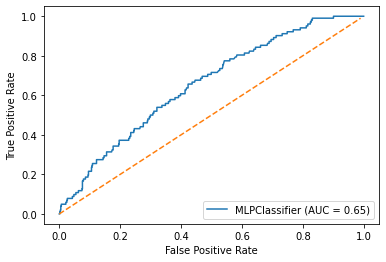

In [746]:
x=np.arange(100)*0.01
y=x

disp = plot_roc_curve(model, xtest, ytest)
plt.plot(x,y, '--')
plt.show()

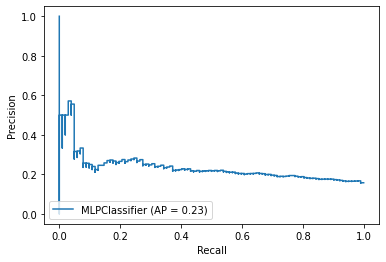

In [747]:
disp = plot_precision_recall_curve(model, xtest, ytest)
plt.show()

# 6- DECISION TREE

In [748]:
from sklearn import tree

In [749]:
tmodel=tree.DecisionTreeClassifier()
tmodel.fit(xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [750]:
predt=tmodel.predict(xtest)
tmodel.score(xtest,ytest)*100

74.3988684582744

In [751]:
accuracy=confusion_matrix(ytest,predt)
TP=accuracy[0][0]
FP=accuracy[1][0]
TN=accuracy[1][1]
FN=accuracy[0][1]

print("Accuracy: ",(TP+TN)/(TP+FP+TN+FN)*100)
print("Probability of detection of defect(Recall, pd): ",TN/(TN+FP))
print("Probability of false alarm(pf): ",FP/(TP+FP))
print("Probability of correct detection(Precision): ", TN/(TN+FN))
print("\n")
print("F1-score or FM: ", f1_score(ytest, predt, average='binary'))
print("AUC value: ",roc_auc_score(ytest, predt))
print("\n")
print(confusion_matrix(ytest,predt))
print("\n")
print(classification_report(ytest,predt))

Accuracy:  74.3988684582744
Probability of detection of defect(Recall, pd):  0.20588235294117646
Probability of false alarm(pf):  0.13822525597269625
Probability of correct detection(Precision):  0.17355371900826447


F1-score or FM:  0.18834080717488788
AUC value:  0.5202965483714147


[[505 100]
 [ 81  21]]


              precision    recall  f1-score   support

           0       0.86      0.83      0.85       605
           1       0.17      0.21      0.19       102

    accuracy                           0.74       707
   macro avg       0.52      0.52      0.52       707
weighted avg       0.76      0.74      0.75       707



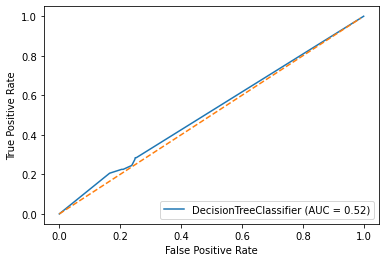

In [752]:
x=np.arange(100)*0.01
y=x

disp = plot_roc_curve(tmodel, xtest, ytest)
plt.plot(x,y, '--')
plt.show()

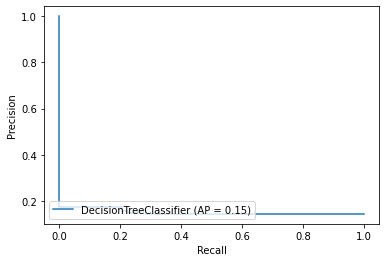

In [753]:
disp = plot_precision_recall_curve(tmodel, xtest, ytest)
plt.show()

# ENSEMBLE PREDICTORS

# 1- ADABOOST

In [754]:
from sklearn.ensemble import AdaBoostClassifier

In [755]:
adamodel = AdaBoostClassifier(n_estimators=100)
adamodel.fit(xtrain,ytrain)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=None)

In [756]:
predada=adamodel.predict(xtest)
adamodel.score(xtest,ytest)*100

85.14851485148515

In [757]:
accuracy=confusion_matrix(ytest,predada)
TP=accuracy[0][0]
FP=accuracy[1][0]
TN=accuracy[1][1]
FN=accuracy[0][1]

print("Accuracy: ",(TP+TN)/(TP+FP+TN+FN)*100)
print("Probability of detection of defect(Recall, pd): ",TN/(TN+FP))
print("Probability of false alarm(pf): ",FP/(TP+FP))
print("Probability of correct detection(Precision): ", TN/(TN+FN))
print("\n")
print("F1-score or FM: ", f1_score(ytest, predada, average='binary'))
print("AUC value: ",roc_auc_score(ytest, predada))
print("\n")
print(confusion_matrix(ytest,predada))
print("\n")
print(classification_report(ytest,predada))

Accuracy:  85.14851485148515
Probability of detection of defect(Recall, pd):  0.029411764705882353
Probability of false alarm(pf):  0.14183381088825214
Probability of correct detection(Precision):  0.3333333333333333


F1-score or FM:  0.05405405405405406
AUC value:  0.5097472046669907


[[599   6]
 [ 99   3]]


              precision    recall  f1-score   support

           0       0.86      0.99      0.92       605
           1       0.33      0.03      0.05       102

    accuracy                           0.85       707
   macro avg       0.60      0.51      0.49       707
weighted avg       0.78      0.85      0.79       707



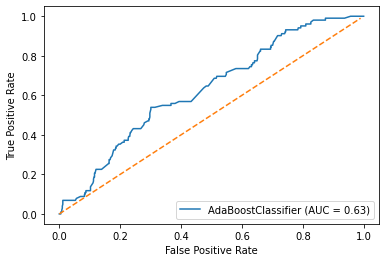

In [758]:
x=np.arange(100)*0.01
y=x

disp = plot_roc_curve(adamodel, xtest, ytest)
plt.plot(x,y, '--')
plt.show()

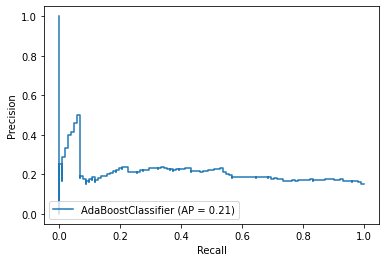

In [759]:
disp = plot_precision_recall_curve(adamodel, xtest, ytest)
plt.show()

# 2- BAGGING

In [760]:
from sklearn.ensemble import BaggingClassifier

In [761]:
bagmodel = BaggingClassifier(base_estimator=None, n_estimators=10) #default=decision tree, SVC()
bagmodel.fit(xtrain, ytrain)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [762]:
predbag=bagmodel.predict(xtest)
bagmodel.score(xtest, ytest)*100

79.34936350777934

In [763]:
accuracy=confusion_matrix(ytest,predbag)
TP=accuracy[0][0]
FP=accuracy[1][0]
TN=accuracy[1][1]
FN=accuracy[0][1]

print("Accuracy: ",(TP+TN)/(TP+FP+TN+FN)*100)
print("Probability of detection of defect(Recall, pd): ",TN/(TN+FP))
print("Probability of false alarm(pf): ",FP/(TP+FP))
print("Probability of correct detection(Precision): ", TN/(TN+FN))
print("\n")
print("F1-score or FM: ", f1_score(ytest, predbag, average='binary'))
print("AUC value: ",roc_auc_score(ytest, predbag))
print("\n")
print(confusion_matrix(ytest,predbag))
print("\n")
print(classification_report(ytest,predbag))

Accuracy:  79.34936350777934
Probability of detection of defect(Recall, pd):  0.13725490196078433
Probability of false alarm(pf):  0.13858267716535433
Probability of correct detection(Precision):  0.19444444444444445


F1-score or FM:  0.16091954022988506
AUC value:  0.5206935666828715


[[547  58]
 [ 88  14]]


              precision    recall  f1-score   support

           0       0.86      0.90      0.88       605
           1       0.19      0.14      0.16       102

    accuracy                           0.79       707
   macro avg       0.53      0.52      0.52       707
weighted avg       0.77      0.79      0.78       707



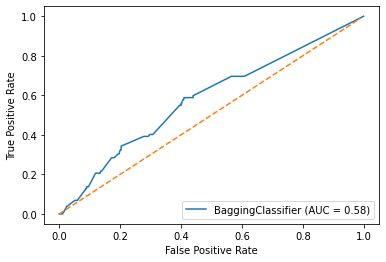

In [764]:
x=np.arange(100)*0.01
y=x

disp = plot_roc_curve(bagmodel, xtest, ytest)
plt.plot(x,y, '--')
plt.show()

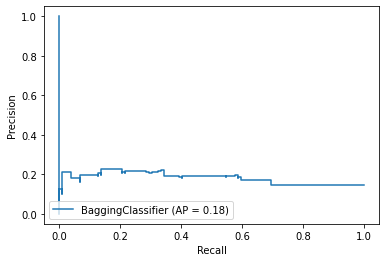

In [765]:
disp = plot_precision_recall_curve(bagmodel, xtest, ytest)
plt.show()

# 3- Extra_Tree_Classifier

In [766]:
from sklearn.ensemble import ExtraTreesClassifier

In [767]:
exmodel = ExtraTreesClassifier(n_estimators=100)
exmodel.fit(xtrain, ytrain)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [768]:
predex=exmodel.predict(xtest)
exmodel.score(xtest,ytest)*100

77.65205091937766

In [769]:
accuracy=confusion_matrix(ytest,predex)
TP=accuracy[0][0]
FP=accuracy[1][0]
TN=accuracy[1][1]
FN=accuracy[0][1]

print("Accuracy: ",(TP+TN)/(TP+FP+TN+FN)*100)
print("Probability of detection of defect(Recall, pd): ",TN/(TN+FP))
print("Probability of false alarm(pf): ",FP/(TP+FP))
print("Probability of correct detection(Precision): ", TN/(TN+FN))
print("\n")
print("F1-score or FM: ", f1_score(ytest, predex, average='binary'))
print("AUC value: ",roc_auc_score(ytest, predex))
print("\n")
print(confusion_matrix(ytest,predex))
print("\n")
print(classification_report(ytest,predex))

Accuracy:  77.65205091937766
Probability of detection of defect(Recall, pd):  0.10784313725490197
Probability of false alarm(pf):  0.14467408585055644
Probability of correct detection(Precision):  0.14102564102564102


F1-score or FM:  0.12222222222222223
AUC value:  0.49854966780100474


[[538  67]
 [ 91  11]]


              precision    recall  f1-score   support

           0       0.86      0.89      0.87       605
           1       0.14      0.11      0.12       102

    accuracy                           0.78       707
   macro avg       0.50      0.50      0.50       707
weighted avg       0.75      0.78      0.76       707



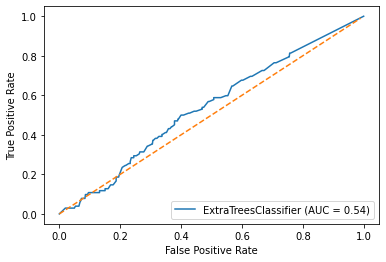

In [770]:
x=np.arange(100)*0.01
y=x

disp = plot_roc_curve(exmodel, xtest, ytest)
plt.plot(x,y, '--')
plt.show()

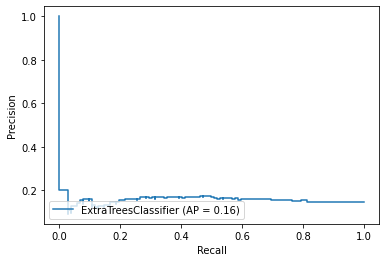

In [771]:
disp = plot_precision_recall_curve(exmodel, xtest, ytest)
plt.show()

# 4- Gradient_Boosting_Classifier

In [772]:
from sklearn.ensemble import GradientBoostingClassifier

In [773]:
gradmodel = GradientBoostingClassifier()
gradmodel.fit(xtrain,ytrain)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [774]:
predgrad=gradmodel.predict(xtest)
gradmodel.score(xtest,ytest)*100

84.86562942008487

In [775]:
accuracy=confusion_matrix(ytest,predgrad)
TP=accuracy[0][0]
FP=accuracy[1][0]
TN=accuracy[1][1]
FN=accuracy[0][1]

print("Accuracy: ",(TP+TN)/(TP+FP+TN+FN)*100)
print("Probability of detection of defect(Recall, pd): ",TN/(TN+FP))
print("Probability of false alarm(pf): ",FP/(TP+FP))
print("Probability of correct detection(Precision): ", TN/(TN+FN))
print("\n")
print("F1-score or FM: ", f1_score(ytest, predgrad, average='binary'))
print("AUC value: ",roc_auc_score(ytest, predgrad))
print("\n")
print(confusion_matrix(ytest,predgrad))
print("\n")
print(classification_report(ytest,predgrad))

Accuracy:  84.86562942008487
Probability of detection of defect(Recall, pd):  0.029411764705882353
Probability of false alarm(pf):  0.14224137931034483
Probability of correct detection(Precision):  0.2727272727272727


F1-score or FM:  0.05309734513274336
AUC value:  0.5080943121050072


[[597   8]
 [ 99   3]]


              precision    recall  f1-score   support

           0       0.86      0.99      0.92       605
           1       0.27      0.03      0.05       102

    accuracy                           0.85       707
   macro avg       0.57      0.51      0.49       707
weighted avg       0.77      0.85      0.79       707



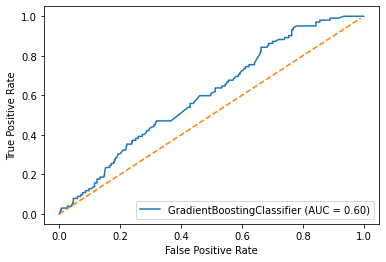

In [776]:
x=np.arange(100)*0.01
y=x

disp = plot_roc_curve(gradmodel, xtest, ytest)
plt.plot(x,y, '--')
plt.show()

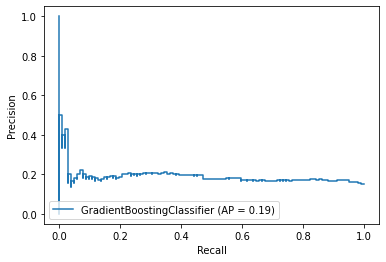

In [777]:
disp = plot_precision_recall_curve(gradmodel, xtest, ytest)
plt.show()

# 5- Random_Forest_Classifier

In [778]:
from sklearn.ensemble import RandomForestClassifier

In [779]:
randmodel = RandomForestClassifier()
randmodel.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [780]:
predrand=randmodel.predict(xtest)
randmodel.score(xtest,ytest)*100

80.05657708628006

In [781]:
accuracy=confusion_matrix(ytest,predrand)
TP=accuracy[0][0]
FP=accuracy[1][0]
TN=accuracy[1][1]
FN=accuracy[0][1]

print("Accuracy: ",(TP+TN)/(TP+FP+TN+FN)*100)
print("Probability of detection of defect(Recall, pd): ",TN/(TN+FP))
print("Probability of false alarm(pf): ",FP/(TP+FP))
print("Probability of correct detection(Precision): ", TN/(TN+FN))
print("\n")
print("F1-score or FM: ", f1_score(ytest, predrand, average='binary'))
print("AUC value: ",roc_auc_score(ytest, predrand))
print("\n")
print(confusion_matrix(ytest,predrand))
print("\n")
print(classification_report(ytest,predrand))

Accuracy:  80.05657708628006
Probability of detection of defect(Recall, pd):  0.12745098039215685
Probability of false alarm(pf):  0.13862928348909656
Probability of correct detection(Precision):  0.2


F1-score or FM:  0.15568862275449102
AUC value:  0.5207502835845083


[[553  52]
 [ 89  13]]


              precision    recall  f1-score   support

           0       0.86      0.91      0.89       605
           1       0.20      0.13      0.16       102

    accuracy                           0.80       707
   macro avg       0.53      0.52      0.52       707
weighted avg       0.77      0.80      0.78       707



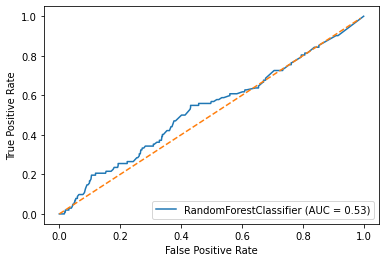

In [782]:
x=np.arange(100)*0.01
y=x

disp = plot_roc_curve(randmodel, xtest, ytest)
plt.plot(x,y, '--')
plt.show()

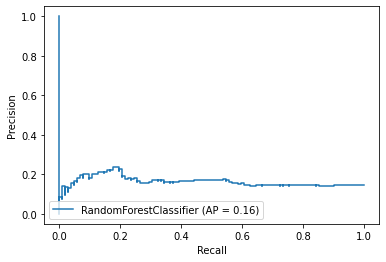

In [783]:
disp = plot_precision_recall_curve(randmodel, xtest, ytest)
plt.show()

# 6- Stacking_Classifier

In [784]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier

In [785]:
estimators = [('rf', RandomForestClassifier(n_estimators=10, random_state=42)), 
              ('svr', make_pipeline(StandardScaler(), LinearSVC(random_state=42)))]

stmodel = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stmodel.fit(xtrain,ytrain)

StackingClassifier(cv=None,
                   estimators=[('rf',
                                RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                     

In [786]:
predst=stmodel.predict(xtest)
stmodel.score(xtest,ytest)*100

85.57284299858557

In [787]:
accuracy=confusion_matrix(ytest,predst)
TP=accuracy[0][0]
FP=accuracy[1][0]
TN=accuracy[1][1]
FN=accuracy[0][1]

print("Accuracy: ",(TP+TN)/(TP+FP+TN+FN)*100)
print("Probability of detection of defect(Recall, pd): ",TN/(TN+FP))
print("Probability of false alarm(pf): ",FP/(TP+FP))
print("Probability of correct detection(Precision): ", TN/(TN+FN))
print("\n")
print("F1-score or FM: ", f1_score(ytest, predst, average='binary'))
print("AUC value: ",roc_auc_score(ytest, predst))
print("\n")
print(confusion_matrix(ytest,predst))
print("\n")
print(classification_report(ytest,predst))

Accuracy:  85.57284299858557
Probability of detection of defect(Recall, pd):  0.0
Probability of false alarm(pf):  0.14427157001414428
Probability of correct detection(Precision):  nan


F1-score or FM:  0.0
AUC value:  0.5


[[605   0]
 [102   0]]


              precision    recall  f1-score   support

           0       0.86      1.00      0.92       605
           1       0.00      0.00      0.00       102

    accuracy                           0.86       707
   macro avg       0.43      0.50      0.46       707
weighted avg       0.73      0.86      0.79       707



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in long_scalars
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


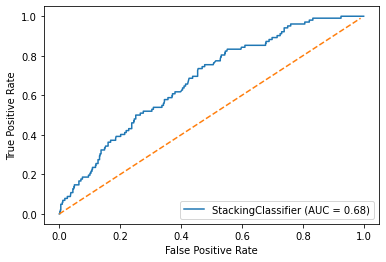

In [788]:
x=np.arange(100)*0.01
y=x

disp = plot_roc_curve(stmodel, xtest, ytest)
plt.plot(x,y, '--')
plt.show()

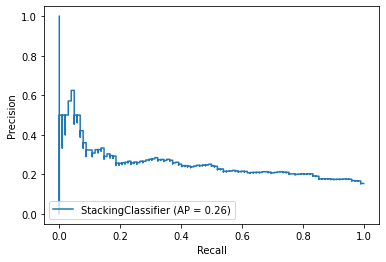

In [789]:
disp = plot_precision_recall_curve(stmodel, xtest, ytest)
plt.show()

# 7- Voting_Classifier

In [790]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

In [791]:
clf1 = LogisticRegression()
clf2 = RandomForestClassifier()#n_estimators=50, random_state=1)
clf3 = GaussianNB()
votmodel = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')
votmodel.fit(xtrain,ytrain)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                             

In [792]:
predvot=votmodel.predict(xtest)
votmodel.score(xtest,ytest)*100

85.2899575671853

In [793]:
accuracy=confusion_matrix(ytest,predvot)
TP=accuracy[0][0]
FP=accuracy[1][0]
TN=accuracy[1][1]
FN=accuracy[0][1]

print("Accuracy: ",(TP+TN)/(TP+FP+TN+FN)*100)
print("Probability of detection of defect(Recall, pd): ",TN/(TN+FP))
print("Probability of false alarm(pf): ",FP/(TP+FP))
print("Probability of correct detection(Precision): ", TN/(TN+FN))
print("\n")
print("F1-score or FM: ", f1_score(ytest, predvot, average='binary'))
print("AUC value: ",roc_auc_score(ytest, predvot))
print("\n")
print(confusion_matrix(ytest,predvot))
print("\n")
print(classification_report(ytest,predvot))

Accuracy:  85.2899575671853
Probability of detection of defect(Recall, pd):  0.0392156862745098
Probability of false alarm(pf):  0.1406025824964132
Probability of correct detection(Precision):  0.4


F1-score or FM:  0.07142857142857142
AUC value:  0.5146491654513045


[[599   6]
 [ 98   4]]


              precision    recall  f1-score   support

           0       0.86      0.99      0.92       605
           1       0.40      0.04      0.07       102

    accuracy                           0.85       707
   macro avg       0.63      0.51      0.50       707
weighted avg       0.79      0.85      0.80       707



# For given input text

In [822]:
l = set(['Mr.', 'Mrs.', 'Ms.', 'Dr.', 'Prof.', 'Rev.', 'Capt.', 'Lt.-Col.', 
'Col.', 'Lt.-Cmdr.', 'The Hon.', 'Cmdr.', 'Flt. Lt.', 'Brgdr.', 'Wng. Cmdr.', 
'Group Capt.' ,'Rt.', 'Maj.-Gen.', 'Rear Admrl.', 'Esq.', 'Mx', 'Adv', 'Jr.',
         'A.','B.','C.','D.','E.','F.','G.','H.','I.','J.','K.','L.','M.','N.',
         'O.','P.','Q.','R.','S.','T.','U.','V.','W.','X.','Y.','Z.','U.S.'] )
s = 'Iraq became a sovereign country Monday morning but only a dozen officials were present at the transfer of power ceremony in the heavily guarded Green Zone of Baghdad. Bremer handed over legal documents that were accepted by Iraq\'s interim Prime Minister Iyad Allawi. '

In [823]:
split_at_period(s, l)

"Iraq became a sovereign country Monday morning but only a dozen officials were present at the transfer of power ceremony in the heavily guarded Green Zone of Baghdad.\nBremer handed over legal documents that were accepted by Iraq's interim Prime Minister Iyad Allawi."

In [824]:
text='Jim rides his bike to school every day'
hypothesis= 'Jim has a bike'

In [825]:
TtestSplit=[]
TtestSplit.append(split_at_period(text, l).split("\n"))
print(TtestSplit)

[['Jim rides his bike to school every day']]


In [826]:
HtestSplit=[]
HtestSplit.append(split_at_period(hypothesis, l).split("\n"))
print(HtestSplit)

[['Jim has a bike']]


In [827]:
from subject_verb_object_extract import findSVOs, nlp
TSOPtest = []#array to fill S,O and p
for FullSentance in TtestSplit:
    SOPFullSentance = []
    for splittedSentance in FullSentance:
        SOPSplittedSentance = []
        tokens = nlp(splittedSentance)
        svos = findSVOs(tokens)
#         print(svos)
        
        S=[]
        O=[]
        P=[]
        for eachSOP in svos:
#             print(eachSOP)
            for eachSubject in eachSOP[0].split(","):
                if(len(eachSubject)>0):
                    S.append(eachSubject)
            if(len(eachSOP)>1):
                for eachPredicate in eachSOP[1].split(","):
                    if(len(eachPredicate)>0):
                        P.append(eachPredicate)
            if(len(eachSOP)>2):
                for eachObject in eachSOP[2].split(","):
                    if(len(eachObject)>0):
                        O.append(eachObject)
        SOPSplittedSentance.append(S)
        SOPSplittedSentance.append(P)
        SOPSplittedSentance.append(O)
        SOPFullSentance.append(SOPSplittedSentance)
    TSOPtest.append(SOPFullSentance)    
#         print(SOPFullSentance)
#         print(O)
#         print(P)
    
print(TSOPtest)
        

[[[['Jim'], ['rides'], ['his bike']]]]


In [828]:
from subject_verb_object_extract import findSVOs, nlp
HSOPtest = []#array to fill S,O and p
for FullSentance in HtestSplit:
    SOPFullSentance = []
    for splittedSentance in FullSentance:
        SOPSplittedSentance = []
        tokens = nlp(splittedSentance)
        svos = findSVOs(tokens)
#         print(svos)
        
        S=[]
        O=[]
        P=[]
        for eachSOP in svos:
#             print(eachSOP)
            for eachSubject in eachSOP[0].split(","):
                if(len(eachSubject)>0):
                    S.append(eachSubject)
            if(len(eachSOP)>1):
                for eachPredicate in eachSOP[1].split(","):
                    if(len(eachPredicate)>0):
                        P.append(eachPredicate)
            if(len(eachSOP)>2):
                for eachObject in eachSOP[2].split(","):
                    if(len(eachObject)>0):
                        O.append(eachObject)
        SOPSplittedSentance.append(S)
        SOPSplittedSentance.append(P)
        SOPSplittedSentance.append(O)
        SOPFullSentance.append(SOPSplittedSentance)
    HSOPtest.append(SOPFullSentance)    
#         print(SOPFullSentance)
#         print(O)
#         print(P)
    
print(HSOPtest)

[[[['Jim'], ['has'], ['a bike']]]]


In [829]:
t_array=['Jim rides his bike to school every day']
h_array=['Jim has a bike']

In [830]:
t_h = []
for i in range (len(t_array)):
    t_h.append(cosineSimilarity(t_array[i],h_array[i]))
print(t_h)

[0.5773502691896258]


In [831]:
TafterSplit=TtestSplit
HafterSplit=HtestSplit
TSOP=TSOPtest
HSOP=HSOPtest

In [832]:
best_t_h =[]
for indexOfFullSentance in range(len(TafterSplit)):
    best=-1
    for TindexOfSplittedSentance in range(len(TafterSplit[indexOfFullSentance])):
        for HindexOfSplittedSentance in range(len(HafterSplit[indexOfFullSentance])):
            a = cosineSimilarity(TafterSplit[indexOfFullSentance][TindexOfSplittedSentance],HafterSplit[indexOfFullSentance][HindexOfSplittedSentance])
            if(best<a):
                best =a
    best_t_h.append(best)
print(best_t_h)

[0.5773502691896258]


In [833]:
best_t_h_spo = []
for indexOfFullSentance in range(len(TSOP)):
    best=-1
    for TindexOfSplittedSentance in range(len(TSOP[indexOfFullSentance])):
        for HindexOfSplittedSentance in range(len(HSOP[indexOfFullSentance])):
            for i in range(3):
                if(len(TSOP[indexOfFullSentance][TindexOfSplittedSentance][i])==0 or HSOP[indexOfFullSentance][HindexOfSplittedSentance][i]==0):
                    a = 0
                    best=0
                else:
                    for j in range(len(TSOP[indexOfFullSentance][TindexOfSplittedSentance][i])):
                        for k in range(len(HSOP[indexOfFullSentance][HindexOfSplittedSentance][i])):
                            a = cosineSimilarity(TSOP[indexOfFullSentance][TindexOfSplittedSentance][i][j],HSOP[indexOfFullSentance][HindexOfSplittedSentance][i][k])
                            if(best<a):
                                best =a
    if(best==-1):
        best=0
    best_t_h_spo.append(best)
print(best_t_h_spo)

[1.0]


In [834]:
avg_t_h_spo = []
for indexOfFullSentance in range(len(TSOP)):
    sum1=0
    count=0
    for TindexOfSplittedSentance in range(len(TSOP[indexOfFullSentance])):
        for HindexOfSplittedSentance in range(len(HSOP[indexOfFullSentance])):
            for i in range(3):

                if(len(TSOP[indexOfFullSentance][TindexOfSplittedSentance][i])==0 or HSOP[indexOfFullSentance][HindexOfSplittedSentance][i]==0):
                    a = 0
                else:
                    for j in range(len(TSOP[indexOfFullSentance][TindexOfSplittedSentance][i])):
                        for k in range(len(HSOP[indexOfFullSentance][HindexOfSplittedSentance][i])):
                            a = cosineSimilarity(TSOP[indexOfFullSentance][TindexOfSplittedSentance][i][j],HSOP[indexOfFullSentance][HindexOfSplittedSentance][i][k])
                            sum1 =sum1+a
                            count=count+1
    
    if(count==0):
        best=0
    else:
        best=sum1/count
    avg_t_h_spo.append(best)
print(avg_t_h_spo)

[0.6666666666666666]


In [836]:
labels=[1]

In [837]:
df = pd.DataFrame(list(zip(t_h, best_t_h, best_t_h_spo, avg_t_h_spo,labels)),
               columns =['t_h', 'best_t_h','best_t_h_spo','avg_t_h_spo','labels'])
df

,t_h,best_t_h,best_t_h_spo,avg_t_h_spo,labels
0,0.57735,0.57735,1.0,0.666667,1


In [839]:
Xdf = df[['t_h', 'best_t_h','best_t_h_spo','avg_t_h_spo']]
Xdf

,t_h,best_t_h,best_t_h_spo,avg_t_h_spo
0,0.57735,0.57735,1.0,0.666667


In [840]:
x_test = Xdf.values 
y_test = df.labels.values

In [844]:
print(x_test, y_test)

[[0.57735027 0.57735027 1.         0.66666667]] [1]


In [845]:
print(votmodel.predict(x_test))

[0]
